# TFG: Network properties of Informal Support Networks in Mental Health

Oriol Martinez Perez

We will work with data set https://zenodo.org/record/7443141 that was created within the CoAct project (as described there). The data is stored in folder data/ within the same folder as this jupyter notebook. 

## 0. Notebook setup

In [23]:
import pandas as pd
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
TYPE_C_PATH = "./data/Answers_to_Microstories/answers_stories_C.pkl"
SOCIODEMOGRAPHIC_PATH = "./data/Sociodemographic_survey/answers_sociodemographic_survey.pkl"

## 1. Load some data

We will work with python, and more specifically with python pandas.

First, we load the answers of the participants to stories type C (See documentation on Zenodo, https://zenodo.org/record/7443141)

In [3]:
df_C = pd.read_pickle(TYPE_C_PATH)
df_C

0       capacitation_Teatre_Amigues                                          \
1                              yo_1  yo_2 yo_final otro_1 otro_2 otro_final   
f91cb3f                           B  None        B      C   None          C   
65fc038                           C  None        C      C   None          C   
5a20153                           C  None        C      C   None          C   
9f4d288                           C  None        C      C   None          C   
a1efa63                           A  None        A      B   None          B   
...                             ...   ...      ...    ...    ...        ...   
024f546                           C  None        C      C   None          C   
190aebe                        None  None     None   None   None       None   
4a92bfd                           C  None        C      C   None          C   
388a24f                           C  None        C      C   None          C   
c2d349a                        None  None     None   None   None       None   

0       Obrir_camí                        ... Incomprensió_1             \
1             yo_1  yo_2 yo_final otro_1  ...         otro_2 otro_final   
f91cb3f          A  None        A      C  ...           None       None   
65fc038       None  None     None   None  ...           None       None   
5a20153          A  None        A      A  ...           None       None   
9f4d288          A  None        A      A  ...           None       None   
a1efa63          A  None        A      A  ...           None       None   
...            ...   ...      ...    ...  ...            ...        ...   
024f546       None  None     None   None  ...           None       None   
190aebe       None  None     None   None  ...           None       None   
4a92bfd          C  None        C      C  ...           None       None   
388a24f       None  None     None   None  ...           None       None   
c2d349a       None  None     None   None  ...           None       None   

0       Por_situacions_socials                             \
1                         yo_1 yo_final otro_1 otro_final   
f91cb3f                   None     None   None       None   
65fc038                   None     None   None       None   
5a20153                   None     None   None       None   
9f4d288                   None     None   None       None   
a1efa63                   None     None   None       None   
...                        ...      ...    ...        ...   
024f546                   None     None   None       None   
190aebe                   None     None   None       None   
4a92bfd                   None     None   None       None   
388a24f                   None     None   None       None   
c2d349a                   None     None   None       None   

0       Reconeixement_comprensio                             
1                           yo_1 yo_final otro_1 otro_final  
f91cb3f                     None     None   None       None  
65fc038                     None     None   None       None  
5a20153                     None     None   None       None  
9f4d288                     None     None   None       None  
a1efa63                     None     None   None       None  
...                          ...      ...    ...        ...  
024f546                     None     None   None       None  
190aebe                     None     None   None       None  
4a92bfd                     None     None   None       None  
388a24f                     None     None   None       None  
c2d349a                     None     None   None       None  

[748 rows x 706 columns]

The DataFrame we loaded is a pandas MultiIndex DataFrame. We are not interested in there intermediate decisions, but only in the FINAL decisions of the participants, so we reduce the DataFrame to columns yo_final and otro_final. Particularly, we create two DataFrames with only these columns.

In [4]:
df_C.columns= df_C.columns.swaplevel(0,1)
df_C_yo   = df_C.yo_final
df_C_otro = df_C.otro_final
df_C.columns= df_C.columns.swaplevel(0,1)

df_C_yo.head(5)

,capacitation_Teatre_Amigues,Obrir_camí,Experiencia_aprenentatge,Gossos,Sanglotant,Empatia_comprensio,Encuentrobis,Ataque_ansiedad_b,Temps_aprendre,Bipolar,...,Joys_motherhood_2,Esperança,Al·lucinacions,Escoltar_temps,Germans,Suport,Realitat_ficció,Incomprensió_1,Por_situacions_socials,Reconeixement_comprensio
f91cb3f,B,A,A,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
65fc038,C,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5a20153,C,A,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9f4d288,C,A,B,C,B,A,B,C,B,None,...,None,None,None,None,None,None,None,None,None,None
a1efa63,A,A,B,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Secondly, we also load the answers of the (same) participants to the sociodemographic survey (columns documented in ./data/Sociodemographic_survey/meta_data_answers.pdf):

In [5]:
df_sociodem = pd.read_pickle(SOCIODEMOGRAPHIC_PATH)
df_sociodem

1,genere,edat,pp,pp_v,pp_v_g,pp_bf,pp_bef,pp_bel,pp_bev,pp_bec,...,p_ac_si,p_g1,p_g2,p_ass,p_prof,p_prof_si,country_alpha2,urban_rural,is_in_Catalonia,language
f91cb3f,f,4,Sí,Sí,a,m,a,a,b,b,...,None,b,m,Sí,No,None,US,None,False,en
65fc038,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,False,ca
5a20153,f,3,No,None,None,None,None,None,None,None,...,None,a,a,Sí,No,None,ES,urban,True,ca
9f4d288,m,4,No,None,None,None,None,None,None,None,...,None,b,b,Sí,Sí,apasa,ES,urban,True,ca
a1efa63,f,2,Sí,Sí,nsdmp,b,m,nsdmp,nvr,nvr,...,nvr,a,m,No,nvr,None,ES,None,False,es
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
024f546,f,1,Sí,Sí,a,m,a,nt,nsdmp,m,...,None,b,m,Sí,Sí,psm,ES,urban,True,ca
190aebe,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,False,ca
4a92bfd,m,4,Sí,Sí,m,m,b,nsdmp,nsdmp,nsdmp,...,None,a,None,No,No,None,ES,None,False,es
388a24f,f,4,Sí,Sí,a,a,a,m,b,b,...,None,a,None,None,None,None,ES,urban,True,ca


### 1.1. Dataframe exploration

In [6]:
df_C_yo.describe()

,capacitation_Teatre_Amigues,Obrir_camí,Experiencia_aprenentatge,Gossos,Sanglotant,Empatia_comprensio,Encuentrobis,Ataque_ansiedad_b,Temps_aprendre,Bipolar,...,Joys_motherhood_2,Esperança,Al·lucinacions,Escoltar_temps,Germans,Suport,Realitat_ficció,Incomprensió_1,Por_situacions_socials,Reconeixement_comprensio
count,580,399,361,332,298,281,248,238,225,204,...,21,21,21,21,20,20,20,20,20,19
unique,3,3,3,3,3,3,3,3,3,3,...,3,3,2,3,3,3,3,3,3,3
top,C,A,A,C,C,B,B,B,A,B,...,C,C,C,C,C,C,C,C,C,C
freq,391,280,152,183,203,120,87,96,104,86,...,13,14,16,9,14,11,12,12,9,11


In [7]:
df_C_yo.isna().sum()

0
capacitation_Teatre_Amigues    168
Obrir_camí                     349
Experiencia_aprenentatge       387
Gossos                         416
Sanglotant                     450
                              ... 
Suport                         728
Realitat_ficció                728
Incomprensió_1                 728
Por_situacions_socials         728
Reconeixement_comprensio       729
Length: 130, dtype: int64

**TASK**: Find out how many women and how many man are in the sample.

In [18]:
df_sociodem['genere'].value_counts()

f      366
m      155
d       11
nvr      3
Name: genere, dtype: int64

In [29]:
df_sociodem[df_sociodem['genere'] == 'f'].shape[0]

366

In [19]:
df_sociodem['country_alpha2'].value_counts()

ES    463
US     17
DE     12
MX      3
AT      3
AR      3
FI      2
BE      2
PT      2
IL      1
CH      1
FR      1
IT      1
CA      1
Name: country_alpha2, dtype: int64

In [20]:
df_sociodem.describe()

1,genere,edat,pp,pp_v,pp_v_g,pp_bf,pp_bef,pp_bel,pp_bev,pp_bec,...,p_ac_si,p_g1,p_g2,p_ass,p_prof,p_prof_si,country_alpha2,urban_rural,is_in_Catalonia,language
count,535,532,508,385,312,382,382,381,381,380,...,162,479,446,473,472,131,512,393,748,748
unique,4,7,3,3,5,5,5,6,5,5,...,4,4,4,3,3,4,14,2,2,4
top,f,4,Sí,Sí,a,a,m,nsdmp,nsdmp,nsdmp,...,m,m,m,No,No,psm,ES,urban,True,ca
freq,366,158,386,313,176,113,134,105,252,174,...,71,188,184,242,322,42,463,321,393,493


## 2. Graph creation

Get a subset of the stories that has at least 50 participants

In [26]:
df_C_yo.shape

(748, 130)

In [8]:
df_C_yo['Obrir_camí'].value_counts().sum()

399

In [9]:
stories = []
for column in df_C_yo.columns:
    if df_C_yo[column].value_counts(dropna=True).sum() > 50:
        stories.append(column)

In [10]:
subset_df = df_C_yo[stories]
subset_df

,capacitation_Teatre_Amigues,Obrir_camí,Experiencia_aprenentatge,Gossos,Sanglotant,Empatia_comprensio,Encuentrobis,Ataque_ansiedad_b,Temps_aprendre,Bipolar,...,Inclusió,Asperger_5,Paraules_màgiques,Esquizofrenia,Angustia_atemorizada_verguenza,Esgarrifós,Ingres_involuntari_2,Incomprensió_10,Colaboración_implicaciónbis,Ocultació_estigma
f91cb3f,B,A,A,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
65fc038,C,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5a20153,C,A,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9f4d288,C,A,B,C,B,A,B,C,B,None,...,None,None,None,None,None,None,None,None,None,None
a1efa63,A,A,B,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
024f546,C,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
190aebe,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4a92bfd,C,C,A,C,C,A,C,None,None,None,...,None,None,None,None,None,None,None,None,None,None
388a24f,C,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Generate a list of 3-tuples

In [11]:
def weight(ans1, ans2):
    """
    Computes weight of the edge that connects participant i and j
    """
    weight = 0
    if ans1 == 'A':
        if ans2 == 'A':
            weight = 1
        elif ans2 == 'B':
            weight = 2/3
    elif ans2 == 'B':
        if ans1 == 'A':
            weight = 2/3
        elif ans1 == 'B':
            weight = 1/3
    
    return weight

In [12]:
ind1 = subset_df.index[0]
ind2 = subset_df.index[2]

print(f'Ind 1: {ind1}, {subset_df["Obrir_camí"][ind1]}')
print(f'Ind 2: {ind2}, {subset_df["Obrir_camí"][ind2]}')

Ind 1: f91cb3f, A
Ind 2: 5a20153, A


In [13]:
print(weight(subset_df['Obrir_camí'][ind1], subset_df['Obrir_camí'][ind2]))

1


In [14]:
# generate dict that contains as keys the story names and as values the 3-tuples
elist_yo = {}
story_count = 1
for column in subset_df.columns:
    print(f'Computing weights for story number {story_count}: {column}...')
    
    elist_yo[column] = []
    for i, id1 in enumerate(subset_df.index):
        for j, id2 in enumerate(subset_df.index):
            if j > i:
                pair = [id1, id2, weight(subset_df[column][id1], subset_df[column][id2])]
                elist_yo[column].append(pair)
    
    # limit the number of stories to analyze to fasten computation
    if story_count == 1:
        break
    story_count += 1
print('Weights computation complete!')

Computing weights for story number 1: capacitation_Teatre_Amigues...
Weights computation complete!


In [15]:
# Chech we compute the weights for all indexes
if len(elist_yo['capacitation_Teatre_Amigues']) == 279378: # 748!/(746! * 2!) is 279378
    print('Correct computation')
else: 
    print('Something went wrong')

Correct computation


In [16]:
story = 'capacitation_Teatre_Amigues'
ans_lst = elist_yo[story]
for i in range(10):
    print(f'Sample {i}:')
    sample = random.choice(ans_lst)
    print(f'\tInd1: {sample[0]}, {subset_df[story][sample[0]]}')
    print(f'\tInd2: {sample[1]}, {subset_df[story][sample[1]]}')
    print(f'\tWeight: {sample[2]}')

Sample 0:
	Ind1: ece9ce7, C
	Ind2: 80701a1, C
	Weight: 0
Sample 1:
	Ind1: 79b129c, C
	Ind2: 6289e6c, C
	Weight: 0
Sample 2:
	Ind1: b05306f, None
	Ind2: 0d5233e, B
	Weight: 0
Sample 3:
	Ind1: aa68b7a, B
	Ind2: a412254, C
	Weight: 0
Sample 4:
	Ind1: f6ffd76, B
	Ind2: 173b4d2, C
	Weight: 0
Sample 5:
	Ind1: 03fd6a4, None
	Ind2: e6d310e, C
	Weight: 0
Sample 6:
	Ind1: fbd29ce, B
	Ind2: 49c80c9, A
	Weight: 0
Sample 7:
	Ind1: a7a34c0, None
	Ind2: 2969d00, B
	Weight: 0
Sample 8:
	Ind1: d41cc3d, None
	Ind2: 9bcb545, C
	Weight: 0
Sample 9:
	Ind1: dbe98d3, C
	Ind2: c810da6, C
	Weight: 0


In [18]:
G = nx.Graph()
G.add_weighted_edges_from(ans_lst)

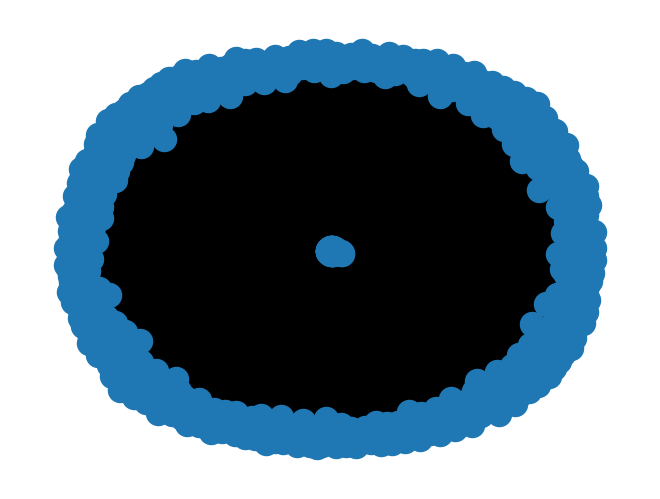

In [26]:
nx.draw(G)

In [27]:
print(G.nodes)

['f91cb3f', '65fc038', '5a20153', '9f4d288', 'a1efa63', '5dbecee', 'f0d3a29', '03d92de', '9846ca8', 'bc1ad54', '3abe69c', 'd3a396c', '6f17bd1', '637819c', '9265cd7', '43d0b63', 'dae9b13', '5177026', '9c76c21', 'd4122df', 'ce36e73', '129e7fa', 'adce8fd', 'c9285e4', '007a721', '5d45bd1', 'cfcbc2d', 'fc53f6c', '38c4951', '3901ca4', 'd9696dd', 'e353d18', '8655fd7', '3e6beba', '277c17a', 'cde7968', 'de45cef', 'd7ff55b', '7b65802', '45f7f6c', '89f6d9e', 'f9639b3', 'd5a5d03', '8f7d05f', '58cb4bb', '4e53c5c', '99cea42', '0d1d4a2', 'a839247', '3d3d373', '48179d1', 'c587cf2', 'c9c92b5', 'a6dece0', '32b1d7b', 'eecc636', 'ec511f8', 'ea146eb', '7e62763', '1415cd3', '9a94644', 'b921637', 'bd4b2f4', 'c094913', '7622483', 'd876b22', '331444e', 'd282bbe', 'ac83cfc', '79b129c', 'ba60a18', 'e4c0f9c', 'aaad0b7', 'c34e373', '5ad0638', '33bcee6', '8470e07', 'd003724', 'd361e6e', 'dcaa5d8', 'c0a644e', '3ecbabb', '03e6b48', '20ab757', 'dd88e0f', '6ab42f2', '906f8e0', '91152e5', 'aa07d95', '924de30', '86c5f35'